In [1]:
import torch
import transformers

print("Torch version:{}".format(torch.__version__)) # Torch version:1.12.1
print("Cuda version: {}".format(torch.version.cuda)) # Cuda version: 11.3
print("transformers version: {}".format(transformers.__version__)) # transformers 4.28.0
print("GPU 사용 가능여부: {}".format(torch.cuda.is_available()))

Torch version:1.13.1
Cuda version: None
transformers version: 4.38.2
GPU 사용 가능여부: False


/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# device = "mps" if torch.backends.mps.is_available() else "cpu"
# print("device: {}".format(device))

device: mps


# 1. Base model and Dataset for RLHF

### 1-1. 허깅페이스의 transformers를 사용 토크나이저와 모델을 Import

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
import numpy

device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "mps" if torch.backends.mps.is_available() else "cpu"
print("device: {}".format(device))

# model_name = "skt/kogpt2-base-v2"
model_name = "skt/ko-gpt-trinity-1.2B-v0.5"
# model_name = 'monologg/distilkobert'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

# 저장할 디렉토리 지정
save_directory = "/Users/kenny_jung/aiffel/data/KoChatGPT/tokenizer_model"

# 모델과 토크나이저 저장하기
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

print("저장 완료 @", save_directory)

device: cpu
저장 완료 @ /Users/kenny_jung/aiffel/data/KoChatGPT/tokenizer_model


In [6]:
# 최대 토큰 수를 확인
tokenizer.max_model_input_sizes

{'openai-community/gpt2': 1024,
 'openai-community/gpt2-medium': 1024,
 'openai-community/gpt2-large': 1024,
 'openai-community/gpt2-xl': 1024,
 'distilbert/distilgpt2': 1024}

In [7]:
# kogpt-2 토크나이징
input_txt = "데이터 과학자의 미래는 생성형 AI 시대에도 불구하고 긍정적이다. 이유는 문제의 정의와 그 해결 방향에 대한 인사이트는 해당 도메인의 이해와 경험이 필요하다."

In [8]:
tokens = tokenizer(input_txt).tokens()
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].numpy()

In [9]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 60
df = pd.DataFrame([tokens, input_ids[0]], index=["kogpt-2_tokens", "Input_IDs"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
kogpt-2_tokens,▁데이터,▁과학,자의,▁미래,는,▁생성,형,▁AI,▁시대,에도,▁불구하고,▁긍정,적이다.,▁이유는,▁문제의,▁정의,와,▁그,▁해결,▁방향,에,▁대한,▁인사,이트,는,▁해당,▁도,메,인의,▁이해,와,▁경험이,▁필요하다.
Input_IDs,33017,31584,30498,31449,20476,35192,29565,38569,32293,30240,32222,33351,34665,32390,37128,32328,25512,29979,31120,31673,25400,30125,31690,30674,20476,30888,30071,22460,30668,30836,25512,37143,36336


### 1-2. Decoder 성능 확인

In [10]:
max_length=128*2
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_greedy = model.generate(input_ids, 
                               max_length=max_length, 
                               do_sample=False)
print(tokenizer.decode(output_greedy[0]))

데이터 과학자의 미래는 생성형 AI 시대에도 불구하고 긍정적이다. 이유는 문제의 정의와 그 해결 방향에 대한 인사이트는 해당 도메인의 이해와 경험이 필요하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족하다. 생성형 AI는 문제 정의와 해결 방향에 대한 인사이트가 부족


In [11]:
# 빔 서치 디코딩을 사용하고 n-gram 패널티까지 부과
input_ids = tokenizer(input_txt, return_tensors="pt")["input_ids"].to(device)
output_beam = model.generate(input_ids, 
                             max_length=max_length, 
                             num_beams=10, 
                             no_repeat_ngram_size=2,
                             do_sample=False)
print(tokenizer.decode(output_beam[0]))

데이터 과학자의 미래는 생성형 AI 시대에도 불구하고 긍정적이다. 이유는 문제의 정의와 그 해결 방향에 대한 인사이트는 해당 도메인의 이해와 경험이 필요하다. 예를 들어 딥러닝은 자연어처리(NLP, Natural Language Processing), 머신 러닝(ML, Machine Learning)과 같은 알고리즘을 활용하여 문제를 정의하고 그 문제를 해결하기 위해 필요한 데이터를 수집, 가공, 분석, 예측, 학습, 추론 등의 과정을 거친다. 이러한 과정을 통해 생성된 데이터는 인공지능이 학습할 수 있는 데이터셋으로 활용될 수 있다. 즉, 데이터의 생성 및 활용은 인공지능의 핵심 역량 중 하나라고 할 수 있다.
 그렇다면 인공지능은 어떻게 생성되는가? 생성 과정은 크게 두 가지 단계로 나뉜다. 첫 번째 단계는 데이터를 생성하는 단계이다. 데이터가 생성되기 위해서는 먼저 생성하고자 하는 데이터에 대해 정의가 선행되어야 한다. 데이터를 정의하는 방법에는 크게 2가지가 있다. 첫 번째는 데이터베이스(DB, Database)를 이용하는 방법이고, 두 번째는 인공지능(AI, Artificial Intelligence)을 활용하는 방법이다.
 두 번째 방법인 인공지능을 활용하는 방법에 대해 알아보도록 하자. 먼저 데이터베이스를 이용하는 방법을 살펴보자. DB를 이용하는 방법은 크게


In [12]:
# 샘플링 기법까지 추가
output_beam = model.generate(input_ids, 
                             max_length=max_length, 
                             num_beams=7, 
                             no_repeat_ngram_size=2,
                             do_sample=True, 
                             temperature=1.0, top_k=50)
print(tokenizer.decode(output_beam[0]))

데이터 과학자의 미래는 생성형 AI 시대에도 불구하고 긍정적이다. 이유는 문제의 정의와 그 해결 방향에 대한 인사이트는 해당 도메인의 이해와 경험이 필요하다. 이러한 인사이트를 얻을 수 있는 것이 바로 '데이터 과학자'이기 때문이다.
 데이터과학자는 데이터에 기반한 의사결정을 통해 문제를 정의하고 해결방안을 도출하는 역할을 수행한다. 데이터가 의사결정 과정에 중요한 역할을 한다는 것은 이미 많은 연구에서 증명된 바 있다. 이러한 데이터의 중요성에 대한 인식은 최근 들어 더욱 확산되고 있는 추세다. 특히 최근 인공지능(AI)과 빅데이터, 클라우드 컴퓨팅, 사물인터넷(IoT), 블록체인 등 4차 산업혁명의 핵심 기술들이 등장하면서 데이터는 더욱 중요해지고 있다.
 데이터를 기반으로 한 문제해결은 데이터 사이언티스트(Data Scientist)에 의해 주도되고 있다. 데이터사이언티는 데이터를 수집, 분석, 가공, 시각화, 시각화 등의 과정을 거쳐 의미 있는 결과물을 도출해내는 전문가다. 이들은 데이터 분석과 시각화를 통해 데이터를 해석하고 의미를 부여해 문제를 해결해 나간다. 이들은 데이터를 분석하고 해석하는 과정에서 다양한 통계적 기법을 활용한다. 이를 통해 도출된 결과물은 AI 알고리즘을 통해 최적화된 결과물로 재탄생하게 된다.
 문제는 이러한 과정이 매우 복잡하고 까다롭다는 것이다. 이를 해결하기 위해 데이터


In [13]:
# top_p 샘플링 기법도 사용
output_beam = model.generate(input_ids, 
                             max_length=max_length, # 테스트 최대 길이
                             num_beams=20,          # 빔 서치의 빔 크기를 설정. 빔 서치는 텍스트 생성 시 여러 가능성 있는 출력 중에서 가장 확률이 높은 출력을 선택
                             no_repeat_ngram_size=2,# 생성된 텍스트 내에서 반복되는 n-gram의 크기를 제한 
                             do_sample=True,        # 단순히 가장 높은 확률을 가진 토큰을 선택하는 대신에 확률 분포에 따라 랜덤하게 토큰을 선택
                             top_p=0.80)            # "nucleus sampling" 또는 "top-p sampling" 기법, 누적 확률이 0.50(50%)에 도달할 때까지 가장 확률이 높은 토큰들만 고려
print(tokenizer.decode(output_beam[0]))

데이터 과학자의 미래는 생성형 AI 시대에도 불구하고 긍정적이다. 이유는 문제의 정의와 그 해결 방향에 대한 인사이트는 해당 도메인의 이해와 경험이 필요하다. 즉, 문제 해결에 필요한 인사이트를 도출해낼 수 있는 능력이 필요하기 때문이다.
 딥러닝(Deep Learning)은 알고리즘(Algorithm)과 데이터(Data)의 합성어로, 인공지능(Artificial Intelligence, AI)의 한 분야다. 컴퓨터가 스스로 학습할 수 있도록 하는 인공신경망(Neural Network, Neurotransmitters, 신경망)을 이용해 데이터를 학습하고 추론하는 기술이다. 인간의 뇌를 모방한 기계학습(machine learning, ML), 자연어 처리(NLP), 이미지 처리(Image Processing), 패턴 인식(Pattern Recognition, PNR) 등의 기술을 활용하여 문제를 정의하고 그 문제를 해결하기 위해 필요한 데이터를 수집, 학습, 분류, 분석, 예측, 최적화 등의 과정을 거쳐 문제를 해결한다. 이러한 과정을 통해 생성된 데이터는 의미 있는 정보로 변환되어 의사결정에 활용될 수 있으며, 이를 통해 새로운 비즈니스를 창출할 수도 있다.</d>


### 1-3. Dataset 확인

In [14]:
# SFT (Supervised Fine-Tuning) Dataset
import json 
data_path_1_SFT = '/Users/kenny_jung/aiffel/data/KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl' 
with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

print(len(list_data_dict))
print(list_data_dict[100:110])

'''
사람이 만든 데이터셋을 사용하여 모델을 미세 조정하는 단계입니다. 
여기서는 사람이 작성한 텍스트 샘플(예를 들어, 질문과 대답 쌍)을 모델에 입력하여, 
모델이 사람의 언어 패턴을 학습하게 됩니다.
'''

12000
[{'prompt': '천안함 침몰 사건에 대한 성금 모금이 진행된 것은 언제인가?', 'completion': "'2010년 4월 9일 천안함 침몰 사건 이후 성금 모금이 즉시 시작되었습니다.", 'tokens': 87}, {'prompt': '이거는 재질이 뭡니까?', 'completion': "'죄송합니다. 이 질문에는 재료에 대한 구체적인 정보가 제공되지 않았습니다. 따라서 해당 제품의 재료를 제공할 수 없습니다. 추가 질문이 있으시면 언제든지 알려주세요.", 'tokens': 98}, {'prompt': '그래도 좀 기대했는데', 'completion': "'그것은 당신이 기대했던 것이 실제로 일어나지 않았기 때문일 수 있습니다. 하지만 이것은 더 나은 결과를 위해 더 많은 노력을 기울이고 일을 더 잘 준비하고 계속해서 노력하는 기회가 될 것입니다. 즉, 실패는 성공의 길에 포함된 일부입니다.", 'tokens': 139}, {'prompt': '새우 필라프는 어떤 거예요?', 'completion': "'새우 필라프는 새우와 쌀을 함께 볶아 만든 전통 음식으로, 주로 스파이스와 함께 조리됩니다. 이 음식은 스페인, 루마니아, 그리스, 터키, 말레이시아, 인도 등 다양한 문화권에서 발전하여 전 세계적으로 인기 있는 요리 중 하나입니다.", 'tokens': 148}, {'prompt': '아인슈타인은 어떤 공로로 노벨물리학상을 받았어', 'completion': "'?\\n\\n아인슈타인은 상대성 이론을 발견하고 이를 기반으로 빛의 속도, 시공간의 개념을 다시 정립했다는 공로로 1921년 노벨물리학상을 받았습니다. 이는 현대 물리학의 발전에 큰 영향을 끼쳤습니다. 또한, 양자 역학과 일반상대성 이론을 통합한 통일학설을 추구하는 노력과 그에 따른 연구도 이루어졌습니다.", 'tokens': 213}, {'prompt': '요런 줄은 얼만데요?', 'completion': "'죄송합니다, 지금 저는 물건을 볼 수 없어서 가격을 알 수 없습니다.

'\n사람이 만든 데이터셋을 사용하여 모델을 미세 조정하는 단계입니다. \n여기서는 사람이 작성한 텍스트 샘플(예를 들어, 질문과 대답 쌍)을 모델에 입력하여, \n모델이 사람의 언어 패턴을 학습하게 됩니다.\n'

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Prompt Lengths: Min=0, Max=295, Mean=22.180583333333335
Completion Lengths: Min=4, Max=1553, Mean=144.10725


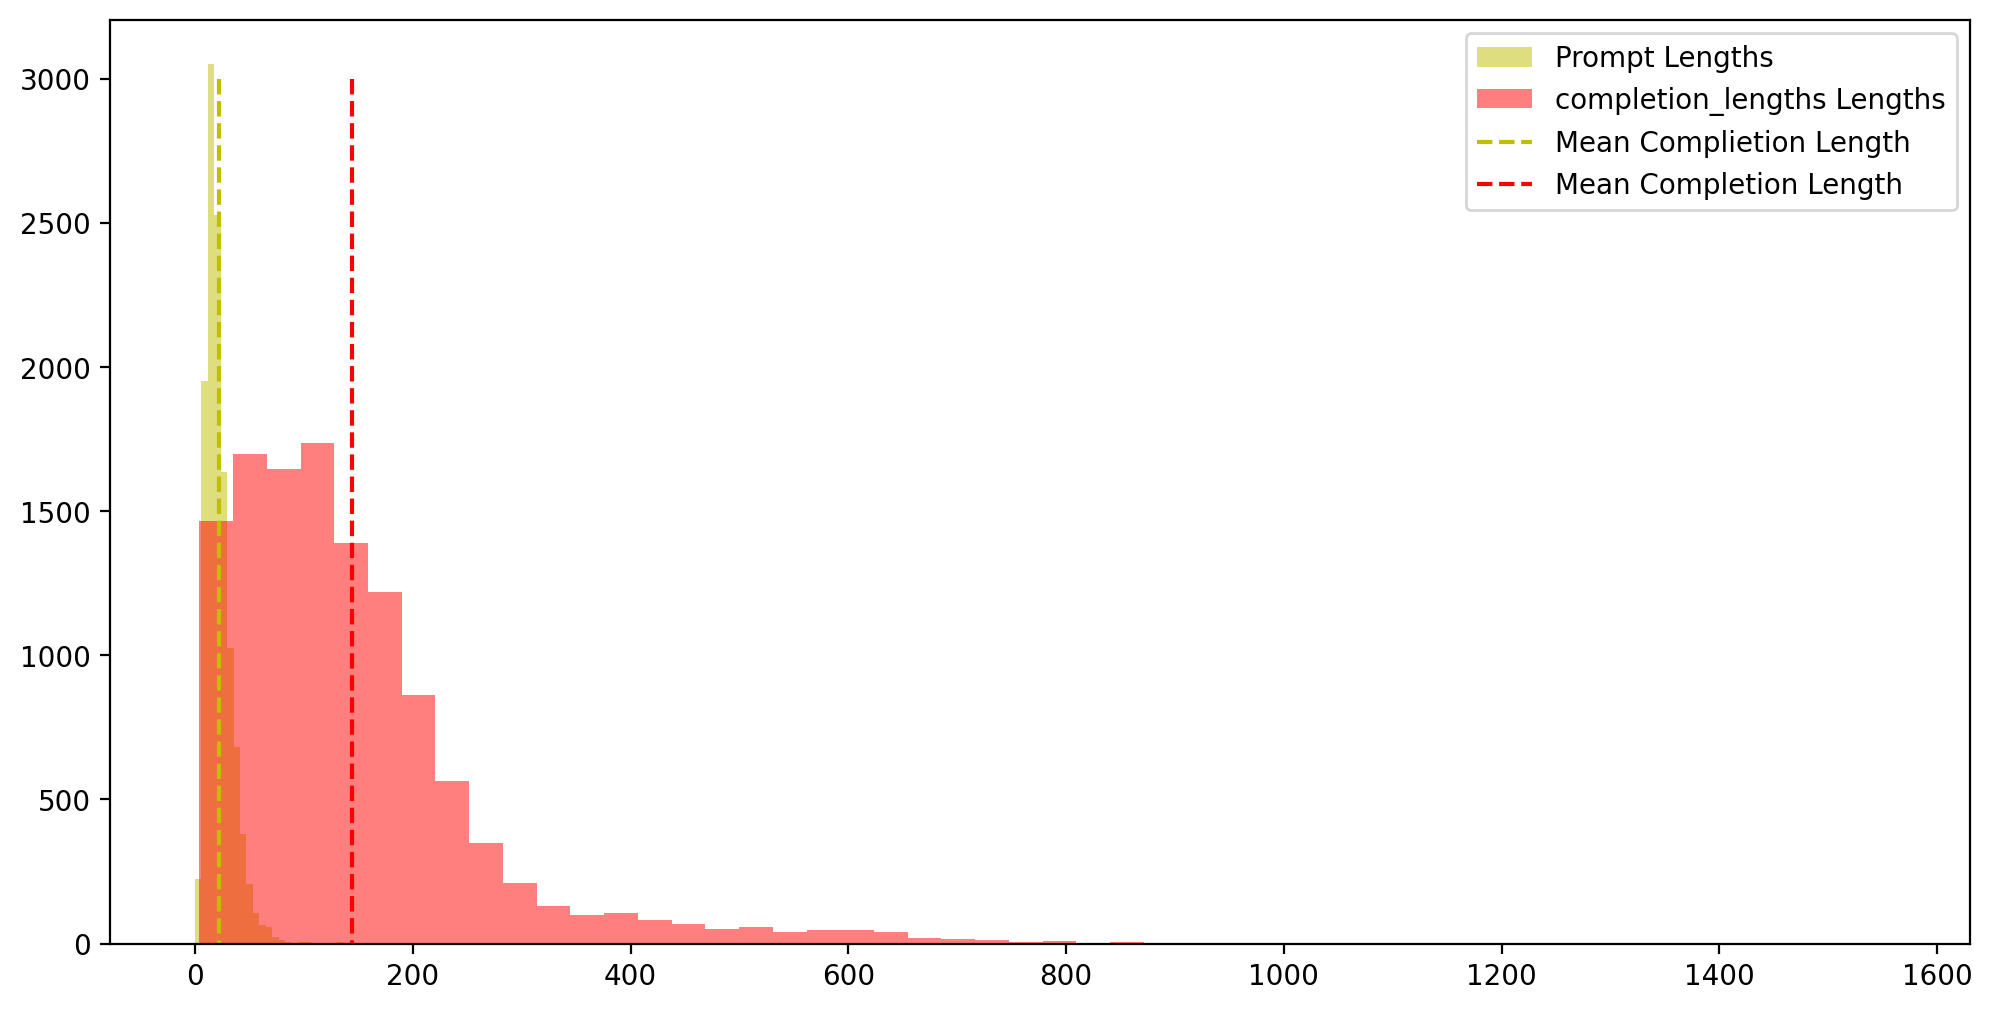

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

prompt_lengths = [len(example['prompt']) for example in list_data_dict]
completion_lengths = [len(example['completion']) for example in list_data_dict]

# 길이 분포에 대한 기본 통계 정보 출력
print(f"Prompt Lengths: Min={min(prompt_lengths)}, Max={max(prompt_lengths)}, Mean={sum(prompt_lengths)/len(prompt_lengths)}")
print(f"Completion Lengths: Min={min(completion_lengths)}, Max={max(completion_lengths)}, Mean={sum(completion_lengths)/len(completion_lengths)}")

plt.figure(figsize=(12, 6))
plt.hist(prompt_lengths, bins=50, color='y', label='Prompt Lengths', alpha=0.5)
plt.hist(completion_lengths, bins=50, color='r', label='completion_lengths Lengths', alpha=0.5)
plt.vlines(sum(prompt_lengths)/len(prompt_lengths), 3000, 0, colors='y', linestyles='--', label='Mean Complietion Length')
plt.vlines(sum(completion_lengths)/len(completion_lengths), 3000, 0, colors='r', linestyles='--', label='Mean Completion Length')
plt.legend()

In [16]:
# RM (Reward Modeling) Dataset
data_path_2_RM = '/Users/kenny_jung/aiffel/data/KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl'
with open(data_path_2_RM, "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

print(len(list_data_dict))
print(list_data_dict[110:120])
'''
각 입력(prompt)에 대해 여러 개의 완성된 텍스트(completion)와 이들의 순위(ranking)가 주어집니다. 
이 정보를 사용하여 모델이 생성한 텍스트의 품질을 평가하는 보상 모델을 훈련시킬 수 있습니다. 
구체적으로, 이 단계에서는 다음과 같은 작업이 이루어집니다:

1. 데이터 준비: 입력(prompt)에 대한 다양한 완성 텍스트(completion)가 준비되며, 
이 텍스트들은 인간 평가자에 의해 순위가 매겨집니다. 이 데이터는 모델이 어떤 출력이 더 선호되는지를 이해하는 데 사용됩니다.

2. 보상 모델 훈련: 준비된 데이터를 사용하여, 모델이 생성한 텍스트의 품질을 평가할 수 있는 보상 모델을 훈련시킵니다. 
이 모델은 각각의 완성 텍스트(completion)에 대한 점수나 순위를 기반으로 보상을 계산합니다.

3. 품질 평가: 보상 모델을 사용하여, 모델이 생성한 텍스트의 품질을 평가합니다. 
이 과정에서 모델이 생성한 텍스트에 대해 높은 점수를 받은 경우, 해당 텍스트는 인간 평가자의 선호도를 잘 반영한 것으로 간주됩니다.


'''

10220
[{'prompt': '이게 정가에요?', 'completion_0': '저는 가격을 알 수 없습니다. 상품의 종류나 상황에 따라 가격이 다르기 때문에, 해당 상품의 판매처나 업체에 가격 문의를 해보세요.', 'completion_1': '고곧 한으로 가시는 한으로 가시는 국남에게 궁', 'completion_2': '그건 다른 곳에 따라 다르지요. 실제 상품을 구매하려는 곳의 가격을 확인해보세요.', 'ranking': [0, 2, 1]}, {'prompt': '막장으로 가네', 'completion_0': '트', 'completion_1': '종료합니다. 감사합니다.', 'completion_2': '죄송합니다. 막장에 가는 것은 좋지 않은 일입니다. 좀 더 평화로운 장소로 가시는 것을 권장합니다.', 'ranking': [2, 1, 0]}, {'prompt': '비디오 영상 혹은 애니메이션 기술을 이용하여 영상 속에 다양한 움직임을 만들어내는 그래픽은?', 'completion_0': '모션 그래픽(Motion Graphics)입니다. 모션 그래픽은 비디오, 애니메이션, 3D 모델링, 이펙트 등의 다양한 그래픽 요소를 사용하여 동영상 속에 다양한 움직임을 만들어내는 기술을 말합니다.', 'completion_1': 'CG (컴퓨터 그래픽스) 또는 VFX (비주얼 이펙트)입니다. 이 기술은 현실적이고 화려한 효과를 만들어내며, 영화, 게임, 광고 등 다양한 매체에서 사용됩니다.', 'completion_2': '사이스 형 기술이 비디오 공연를 하여 경기행동이 군) 크게 흔', 'ranking': [1, 0, 2]}, {'prompt': '여자친구가 데이트 시간을 너무 안 지켜.', 'completion_0': '여자친구가 데이트 시간을 지켜주지 않을 경우 적당한 대처법은 다음과 같습니다.\n\n1. 말씀하기 : 여자친구에게 데이트 시간을 지켜주기를 요청하고, 중요함을 인정하는 말씀을 꼭 드려야 합니다. \n\n2. 차별되게 대하기 : 데이트 시

'\n각 입력(prompt)에 대해 여러 개의 완성된 텍스트(completion)와 이들의 순위(ranking)가 주어집니다. \n이 정보를 사용하여 모델이 생성한 텍스트의 품질을 평가하는 보상 모델을 훈련시킬 수 있습니다. \n구체적으로, 이 단계에서는 다음과 같은 작업이 이루어집니다:\n\n1. 데이터 준비: 입력(prompt)에 대한 다양한 완성 텍스트(completion)가 준비되며, \n이 텍스트들은 인간 평가자에 의해 순위가 매겨집니다. 이 데이터는 모델이 어떤 출력이 더 선호되는지를 이해하는 데 사용됩니다.\n\n2. 보상 모델 훈련: 준비된 데이터를 사용하여, 모델이 생성한 텍스트의 품질을 평가할 수 있는 보상 모델을 훈련시킵니다. \n이 모델은 각각의 완성 텍스트(completion)에 대한 점수나 순위를 기반으로 보상을 계산합니다.\n\n3. 품질 평가: 보상 모델을 사용하여, 모델이 생성한 텍스트의 품질을 평가합니다. \n이 과정에서 모델이 생성한 텍스트에 대해 높은 점수를 받은 경우, 해당 텍스트는 인간 평가자의 선호도를 잘 반영한 것으로 간주됩니다.\n\n\n'

Prompt Lengths: Min=0, Max=295, Mean=22.203228962818002
Completion_0 Lengths: Min=0, Max=3088, Mean=117.4931506849315
Completion_1 Lengths: Min=0, Max=3694, Mean=116.80567514677104
Completion_2 Lengths: Min=0, Max=2979, Mean=116.0054794520548


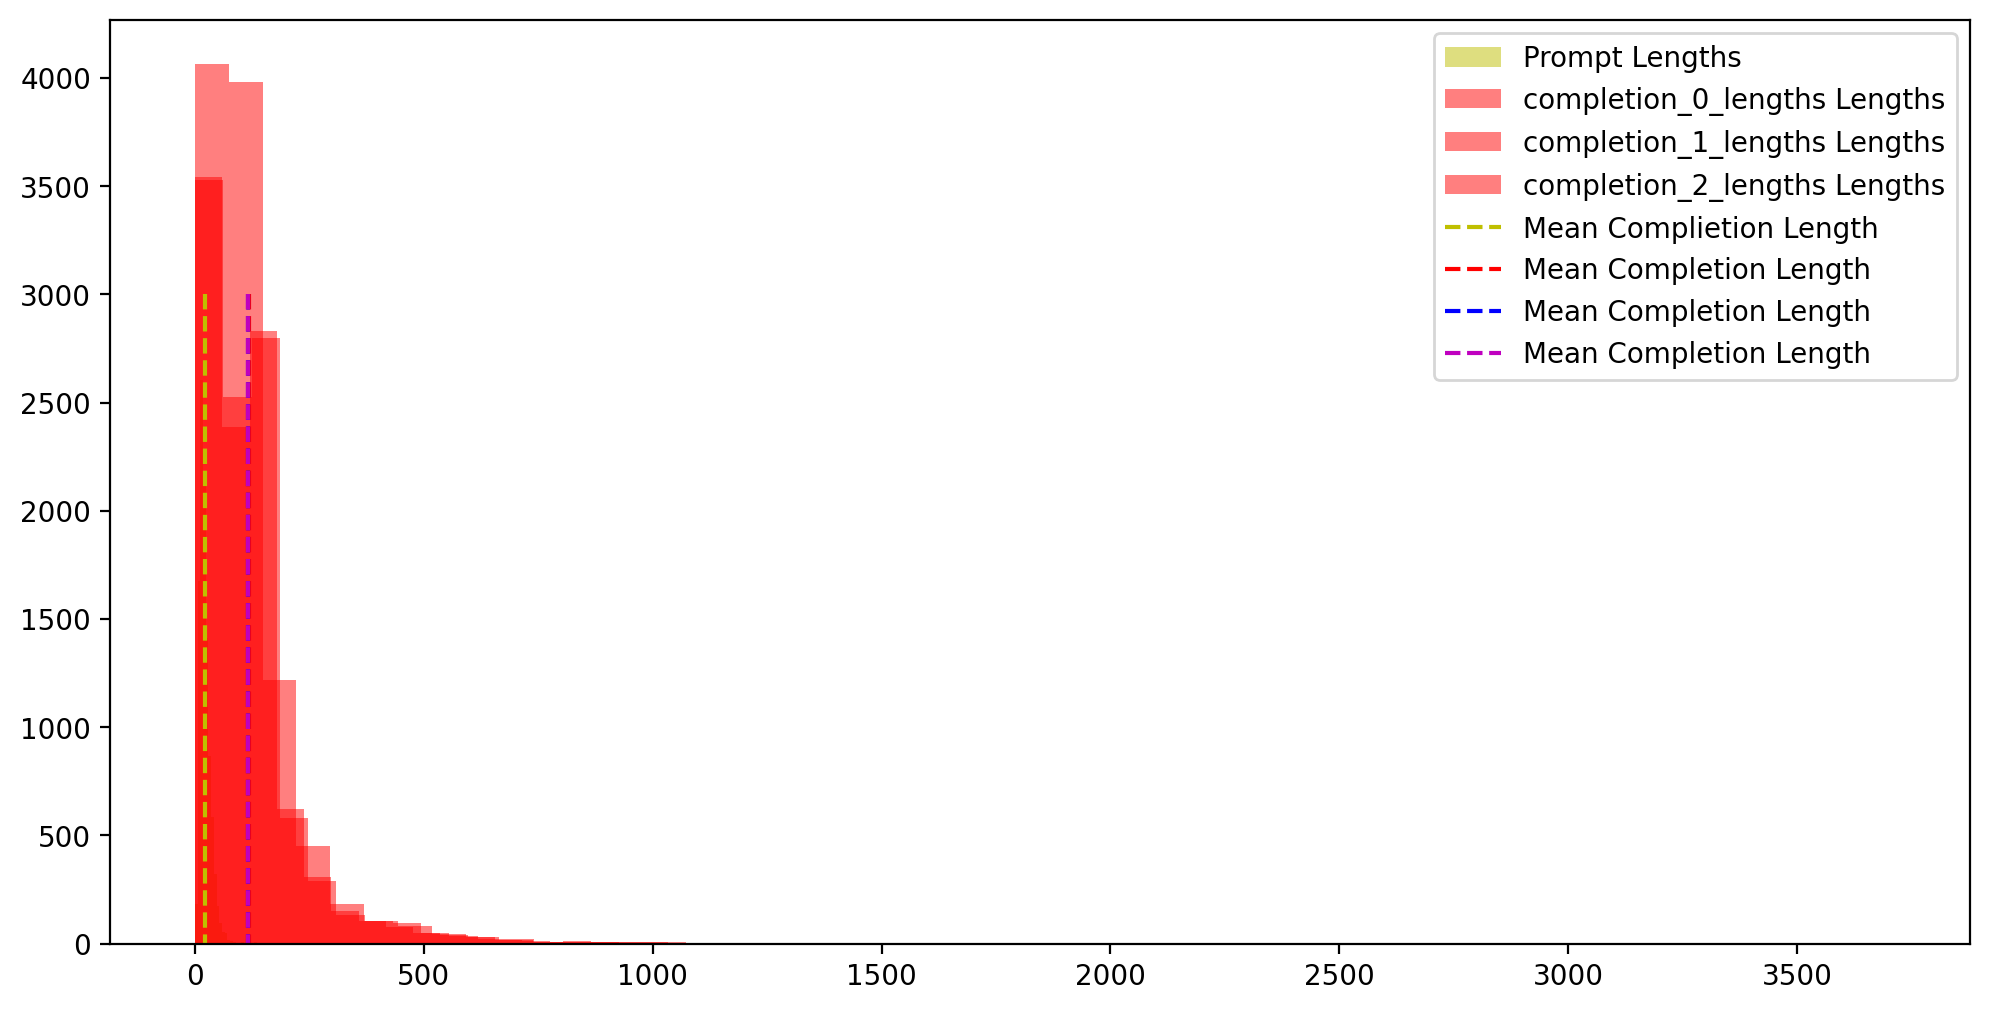

In [17]:
prompt_lengths = [len(example['prompt']) for example in list_data_dict]
completion_0_lengths = [len(example['completion_0']) for example in list_data_dict]
completion_1_lengths = [len(example['completion_1']) for example in list_data_dict]
completion_2_lengths = [len(example['completion_2']) for example in list_data_dict]

# 길이 분포에 대한 기본 통계 정보 출력
print(f"Prompt Lengths: Min={min(prompt_lengths)}, Max={max(prompt_lengths)}, Mean={sum(prompt_lengths)/len(prompt_lengths)}")
print(f"Completion_0 Lengths: Min={min(completion_0_lengths)}, Max={max(completion_0_lengths)}, Mean={sum(completion_0_lengths)/len(completion_0_lengths)}")
print(f"Completion_1 Lengths: Min={min(completion_1_lengths)}, Max={max(completion_1_lengths)}, Mean={sum(completion_1_lengths)/len(completion_1_lengths)}")
print(f"Completion_2 Lengths: Min={min(completion_2_lengths)}, Max={max(completion_2_lengths)}, Mean={sum(completion_2_lengths)/len(completion_2_lengths)}")

plt.figure(figsize=(12, 6))
plt.hist(prompt_lengths, bins=50, color='y', label='Prompt Lengths', alpha=0.5)
plt.hist(completion_0_lengths, bins=50, color='r', label='completion_0_lengths Lengths', alpha=0.5)
plt.hist(completion_1_lengths, bins=50, color='r', label='completion_1_lengths Lengths', alpha=0.5)
plt.hist(completion_2_lengths, bins=50, color='r', label='completion_2_lengths Lengths', alpha=0.5)

plt.vlines(sum(prompt_lengths)/len(prompt_lengths), 3000, 0, colors='y', linestyles='--', label='Mean Complietion Length')
plt.vlines(sum(completion_0_lengths)/len(completion_0_lengths), 3000, 0, colors='r', linestyles='--', label='Mean Completion Length')
plt.vlines(sum(completion_1_lengths)/len(completion_1_lengths), 3000, 0, colors='b', linestyles='--', label='Mean Completion Length')
plt.vlines(sum(completion_2_lengths)/len(completion_2_lengths), 3000, 0, colors='m', linestyles='--', label='Mean Completion Length')

plt.legend()


In [18]:
# PPO (Proximal Policy Optimization) dataset
data_path_3_PPO = '/Users/kenny_jung/aiffel/data/KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl'
with open(data_path_3_PPO, "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

print(len(list_data_dict))
print(list_data_dict[400:410])

'''
PPO 학습 과정에서 모델이 이 prompt들을 바탕으로 텍스트를 생성하고, 
이 생성된 텍스트에 대해 보상 모델로부터 보상을 받게 되며, 
이 보상을 기반으로 모델을 학습시키는 구조입니다. 
학습의 목표는 보상을 최대화하는 방향으로 모델의 출력을 조정
'''

12000
[{'prompt': '미스터 허드슨의 소속은?'}, {'prompt': '날씨가 진짜 덥다'}, {'prompt': '파운데이션을 사려고 하는데요.'}, {'prompt': '성 베드로 광장을 설계한 인물은?'}, {'prompt': '짝사랑 그만하고 싶다'}, {'prompt': '손학규 후보가 여론조사에서 몇프로를 제안하였나?'}, {'prompt': '여기 주차할 데는 없죠?'}, {'prompt': '여자친구가 나를 sns에 올리지 않아서 서운해.'}, {'prompt': '대학생들 쿠션은 어떤 거 많이 쓰나요?'}, {'prompt': '반기문과 경쟁하던 샤시 타루르의 국적은?'}]


'\nPPO 학습 과정에서 모델이 이 prompt들을 바탕으로 텍스트를 생성하고, \n이 생성된 텍스트에 대해 보상 모델로부터 보상을 받게 되며, \n이 보상을 기반으로 모델을 학습시키는 구조입니다. \n학습의 목표는 보상을 최대화하는 방향으로 모델의 출력을 조정\n'

Prompt Lengths: Min=0, Max=295, Mean=22.180583333333335


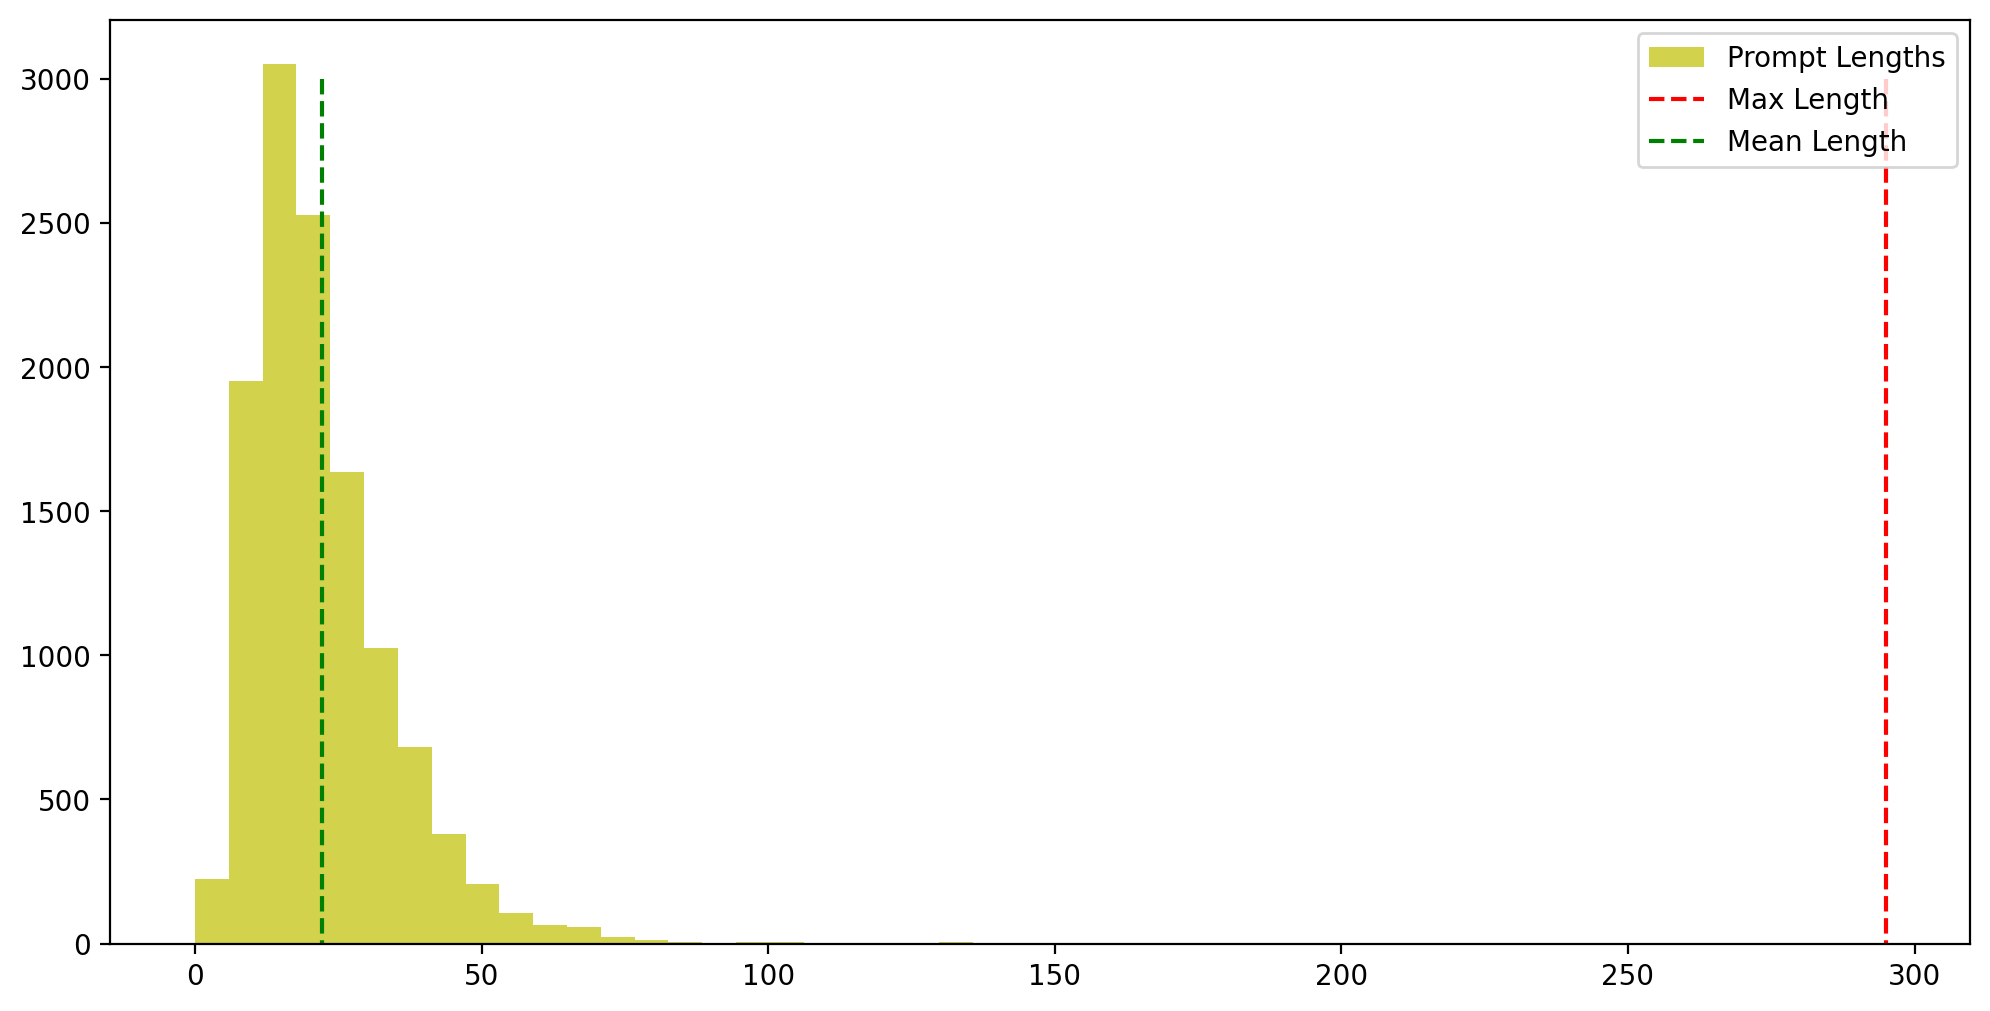

In [19]:
prompt_lengths = [len(example['prompt']) for example in list_data_dict]

# 길이 분포에 대한 기본 통계 정보 출력
print(f"Prompt Lengths: Min={min(prompt_lengths)}, Max={max(prompt_lengths)}, Mean={sum(prompt_lengths)/len(prompt_lengths)}")

plt.figure(figsize=(12, 6))
plt.hist(prompt_lengths, bins=50, color='y', label='Prompt Lengths', alpha=0.7)
plt.vlines(max(prompt_lengths), 3000, 0, colors='r', linestyles='--', label='Max Length')
plt.vlines(sum(prompt_lengths)/len(prompt_lengths), 3000, 0, colors='g', linestyles='--', label='Mean Length')
plt.legend()

# 2. Supervised Fine-Tuning

### 2-1. SFT (skt/ko-gpt-trinity-1.2B-v0.5를 instruction dataset으로 SFT를 진행)

In [3]:
PYTORCH_ENABLE_MPS_FALLBACK=1

In [4]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim import Adam
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from transformers import Trainer, TrainingArguments
from copy import deepcopy
import copy
import logging
import json
from dataclasses import dataclass

RuntimeError: Failed to import transformers.pipelines because of the following error (look up to see its traceback):
cannot import name 'LRScheduler' from 'torch.optim.lr_scheduler' (/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/torch/optim/lr_scheduler.py)

In [21]:
import torch

# MPS 사용 가능 여부 확인
print("Is MPS available:", torch.backends.mps.is_available())

# PyTorch 버전 확인
print("PyTorch version:", torch.__version__)

Is MPS available: True
PyTorch version: 1.13.1


In [22]:
# 모델과 토크나이저를 불러오겠습니다.
model = AutoModelForCausalLM.from_pretrained('skt/ko-gpt-trinity-1.2B-v0.5')
tokenizer = AutoTokenizer.from_pretrained(
    'skt/ko-gpt-trinity-1.2B-v0.5', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=512,
)

print(tokenizer)

GPT2TokenizerFast(name_or_path='skt/ko-gpt-trinity-1.2B-v0.5', vocab_size=51200, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '</s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("<usr>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("<sys>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	5: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	6: AddedToken("<mask>", rstri

In [23]:
# 모델 인퍼런스 단계에서 사용할 prompt 딕셔너리 템플릿과 SFT 데이터셋 클래스를 정의
from typing import Optional, Dict, Sequence

class SFT_dataset(Dataset):

    def __init__(self, data_path_1_SFT: str, tokenizer: transformers.PreTrainedTokenizer, verbose=False):
        super(SFT_dataset, self).__init__()
        logging.warning("Loading data...")

        pattern_instruction = 'prompt'  # instruction
        pattern_output = 'completion'  # response

        with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
            list_data_dict = json.load(json_file)

        PROMPT_DICT = {
            "prompt_input": (
                "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
            )
        }

        prompt_input = PROMPT_DICT["prompt_input"]

        sources = []
        
        for example in list_data_dict:
            tmp = prompt_input.format_map(example)
            sources.append(tmp)

        targets = []
        
        for example in list_data_dict:
            targets.append(f"{example[pattern_output]}{tokenizer.eos_token}")
        examples = [s + t for s, t in zip(sources, targets)]

        sources_tokenized = self._tokenize_fn(sources, tokenizer)  # source
        examples_tokenized = self._tokenize_fn(examples, tokenizer)  # source + target

        input_ids = examples_tokenized["input_ids"]
        labels = copy.deepcopy(input_ids)
        
        for label, source_len in zip(labels, sources_tokenized["input_ids_lens"]):
            label[:source_len] = -100

        data_dict = dict(input_ids=input_ids, labels=labels)

        self.input_ids = data_dict["input_ids"]
        self.labels = data_dict["labels"]
        logging.warning("Loading data done!!: %d"%(len(self.labels)))


    def _tokenize_fn(self, strings: Sequence[str], tokenizer: transformers.PreTrainedTokenizer) -> Dict:
        tokenized_list = [
            tokenizer(
                text,
                return_tensors="pt",
                padding="longest",
                max_length=tokenizer.model_max_length,
                truncation=True,
            )
            for text in strings
        ]
        input_ids = labels = [tokenized.input_ids[0] for tokenized in tokenized_list]
        input_ids_lens = labels_lens = [
            tokenized.input_ids.ne(tokenizer.pad_token_id).sum().item() for tokenized in tokenized_list
        ]
        return dict(
            input_ids=input_ids,
            labels=labels,
            input_ids_lens=input_ids_lens,
            labels_lens=labels_lens,
        )


    def __len__(self):
        return len(self.input_ids)


    def __getitem__(self, i) -> Dict[str, torch.Tensor]:
        return dict(input_ids=self.input_ids[i], labels=self.labels[i])

In [24]:
@dataclass
class DataCollatorForSupervisedDataset(object): 

    tokenizer: transformers.PreTrainedTokenizer

    def __call__(self, instances: Sequence[Dict]) -> Dict[str, torch.Tensor]:
        input_ids, labels = tuple([instance[key] for instance in instances] for key in ("input_ids", "labels"))
        input_ids = torch.nn.utils.rnn.pad_sequence(
            input_ids, batch_first=True, padding_value=self.tokenizer.pad_token_id
        )
        labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value= -100)
        return dict(
            input_ids=input_ids,
            labels=labels,
            attention_mask=input_ids.ne(self.tokenizer.pad_token_id),
        )

### 2-2. 훈련셋을 만들고 data collator 인스턴스

In [25]:
train_dataset = SFT_dataset(data_path_1_SFT='/Users/kenny_jung/aiffel/data/KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl', tokenizer=tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

print('input : %s'%train_dataset.input_ids[100])
print('output: %s'%train_dataset.labels[100])

input : tensor([30132, 42872, 33313, 30679, 40479, 39911,   384, 22509, 21921, 25372,
          385, 31245, 27140, 25264, 29392, 43754, 38280, 30125, 30074, 19312,
        30012, 33248, 39001, 30219, 31572, 30983, 30357,   376, 42872,   379,
        46803,   456, 30303, 35353,   384, 25785, 20573, 37780,   383, 31845,
        30374, 31225, 34090, 46180, 43754, 30702, 30305, 30074, 19312, 30012,
        33248, 35150, 30300, 49009,     1])
output: tensor([ -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,   383, 31845,
        30374, 31225, 34090, 46180, 43754, 30702, 30305, 30074, 19312, 30012,
        33248, 35150, 30300, 49009,     1])


In [26]:
# train_dataset.input_ids[1000]를 디코딩
print(tokenizer.decode(train_dataset.input_ids[1000]))

### Instruction(명령어):
페르시아 전쟁은 누가 그리스를 침공한 전쟁이지

### Response(응답):'?\n\n페르시아 제국이 그리스를 침공한 전쟁입니다.</s>


### 2-3 Training arguments를 사용해 trainer 클래스를 정의

In [27]:
training_args = TrainingArguments(
    output_dir="/Users/kenny_jung/aiffel/data/KoChatGPT/test",
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=5,
    prediction_loss_only=True,
    # fp16 = True
    )
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset
)

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


### 2-4. SFT 훈련

In [30]:
trainer.train()
model.save_pretrained('/Users/kenny_jung/aiffel/data/KoChatGPT/output_1_SFT')

AttributeError: module 'torch' has no attribute 'mps'

In [26]:
# 허깅페이스의 pipleline 클래스를 사용하여 generator를 만들어
generator = pipeline('text-generation', model='../aiffel/KoChatGPT/output_1_SFT', tokenizer=tokenizer)

generation_args = dict(   
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=375, # \n   
    max_new_tokens=64,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}

list_prompt = ['불고기용 고기 한우에요?',
               '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
               '시카고 오헤어 국제공항은 어디에 있어?',
               '오늘 미세먼지 어때?']

list_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt' : tmp}) for tmp in list_prompt]

list_result = generator(list_prompt, **generation_args)   
for prompt, result in zip(list_prompt, list_result):
    print()
    print((result[0]['generated_text']))

/opt/conda/lib/python3.9/site-packages/transformers/generation/utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(



### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 인공지능 어시스턴트이기 때문에 불고기용 고기의 종류와 양에 대한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기는 쇠고기와 함께 먹는 음식 중 하나입니다. 따라서 불고기를 먹을 수 있는 종류는 다양합니다. 예를 들어, 닭가슴살 스테이크, 오므라이스 샐러드 등이 있습니다.

### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):'리처드 닉슨은 42대 부통령직을 수행했습니다.作)作)은 "리처드 닉슨"이 41대 부통령을 수행한 년도를 가리키는 말입니다.作)는 "리처드 닉슨"이 40대 부통령을 맡았던 년도를 의미합니다.作은 "리처드슨"이 50대 부통령

### Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어?

### Response(응답):'시카고 오 헤어 국제공항은 미국 캘리포니아주 샌프란시스코에 위치해 있습니다.子供共和國際空港)이라고 불립니다.子供公和国際空港이라는 뜻입니다.子供空和國際公港이라는 이름을 가진 항공사는 다음과 같습니다.\n\n1. 대한항공

### Instruction(명령어):
오늘 미세먼지 어때?

### Response(응답):'저는 인공지능 챗봇으로써 미세먼지 정보를 알 수 없습니다. 미세먼지 예보를 확인해 보시는 것이 좋겠습니다.\n\n미세먼지 예보: 일반적으로 미세먼지는 주로 중국에서 발원하여 중국 전역으로 퍼져나가기 때문에 중국발 미세먼지가 유입될


In [74]:
torch.cuda.empty_cache()

# 3. Reward Model

In [29]:
import sys
sys.path.append('../aiffel/KoChatGPT/colossalai_ChatGPT_230319')

import os
import json
from typing import Optional
import torch
import torch.nn as nn
from torch.optim import Adam
from chatgpt.dataset import RewardDataset
from chatgpt.models.base import RewardModel
from chatgpt.trainer import RewardModelTrainer
from chatgpt.trainer.strategies import NaiveStrategy
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel, AutoConfig
from transformers.models.gpt2.configuration_gpt2 import GPT2Config
from transformers.models.gpt2.modeling_gpt2 import GPT2Model
import loralib as lora

### 3-1. GPTRM_custom 이라는 이름으로 클래스를 선언

In [30]:
class GPTRM_custom(RewardModel):

    def __init__(self,
                 pretrained: Optional[str] = None,
                 config: Optional[GPT2Config] = None,
                 checkpoint: bool = False,
                 lora_rank: int = 0,
                 lora_train_bias: str = 'none',
                 tokenizer=None) -> None:
        if pretrained is not None:
            model = GPT2Model.from_pretrained(pretrained)
            model.resize_token_embeddings(len(tokenizer))
        elif config is not None:
            model = GPT2Model(config)
        else:
            model = GPT2Model(GPT2Config())
        if checkpoint:
            model.gradient_checkpointing_enable()

        value_head = nn.Linear(model.config.n_embd, 1)
        super().__init__(model, value_head, lora_rank, lora_train_bias)

        if pretrained is not None:
            self.model = model
            self.pretrained = pretrained


    def save_pretrained(self, dir):
        if self.pretrained is not None:
            self.model.save_pretrained(dir)

In [31]:
model = AutoModelForCausalLM.from_pretrained('skt/kogpt2-base-v2')
tokenizer = AutoTokenizer.from_pretrained(
    'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=512,
)

with NaiveStrategy().model_init_context():
        model = GPTRM_custom(pretrained='skt/kogpt2-base-v2', lora_rank=0, tokenizer=tokenizer).cuda()

Some weights of the model checkpoint at skt/kogpt2-base-v2 were not used when initializing GPT2Model: ['lm_head.weight']
- This IS expected if you are initializing GPT2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing GPT2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [32]:
# RM을 훈련시킬 때 사용할 ranking dataset
with open('../aiffel/KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

total_data_ranking2chosen = []
for tmp in list_data_dict:
    one_data_ranking2chosen = []

    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][0] < tmp['ranking'][1]:
        data['chosen'] = tmp['completion_0']
        data['rejected'] = tmp['completion_1']
    else:
        data['chosen'] = tmp['completion_1']
        data['rejected'] = tmp['completion_0']
    one_data_ranking2chosen.append(data)

    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][0] < tmp['ranking'][2]:
        data['chosen'] = tmp['completion_0']
        data['rejected'] = tmp['completion_2']
    else:
        data['chosen'] = tmp['completion_2']
        data['rejected'] = tmp['completion_0']
    one_data_ranking2chosen.append(data)

    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][1] < tmp['ranking'][2]:
        data['chosen'] = tmp['completion_1']
        data['rejected'] = tmp['completion_2']
    else:
        data['chosen'] = tmp['completion_2']
        data['rejected'] = tmp['completion_1']
    one_data_ranking2chosen.append(data)



    total_data_ranking2chosen.extend(one_data_ranking2chosen)

print('before data num: %d'%(len(list_data_dict)))
print('after  data num: %d'%(len(total_data_ranking2chosen)))
print('data example: \n%s'%total_data_ranking2chosen[45])

before data num: 10220
after  data num: 30660
data example: 
{'prompt': '애플은 리사를 어떻게 처리했어', 'chosen': '애플이 누구인지 명확히 알 수 없어서, 리사가 누구인지와 어떤 상황에서 처리되었는지에 대한 추가적인 정보가 필요합니다. 따라서, 보다 정확한 답변을 제공할 수 없습니다.', 'rejected': '애플은 리사를 위해 고객 서비스 부서에서 고객 다양한 컴퓨터 관련 문제에 대해 응답하는 데 필요한 모든 지원을 제공했습니다. 사용자가 하드웨어 문제를 경험할 때, 전문가들은 필요한 수리(수리, 추가 부품 제공, 소프트웨어 업그레이드 등)을 제공해 드릴 수 있습니다. 또한, 사용자가 사용 방법 문제나 기타 문제를 경험할 때, 대화 상대로 사용자를 지원할 수 있는 전문 고객 서비스 직원들이 사용자에게 상담하고 도움을 주는 데 도움이 될 수 있는 정보를 제공합니다. 또한, 인터넷에서 제공되는 정보를 통해 문제를 해결하거나 고객 서비스 웹 사이트를 통해 자신의 문제를 진단할 수 있도록 하는 등 다양한 방법으로 리사를 처리해 왔습니다.'}


### 3-2. ranking dataset을 shuffle한 후 훈련셋 생서

In [34]:
import random
random.seed(230319)
random.shuffle(total_data_ranking2chosen)
print(total_data_ranking2chosen[100])

{'prompt': '반기문이 강하고 인간적인 지도자이며 한국 대통령으로 적합한 인물이라고 보도한 미국의 경제지는?', 'chosen': '해당 질문은 그 어떤 경제지도 답변을 하기 어려운 주관적인 내용이므로, 저는 답변드릴 수 없습니다.', 'rejected': '국내 공로는 국가에 대한 국가를 국획하는 것에 기계적으로 국가의 국가개인 국가국인 국가국을 국가의 국가국을 국가의 국가국을 국가의 국가국을 국가의 국가국을 국가국을 국가국을 국가국을 국가국을 국가국을 국가국을 국가국을 국가'}


In [35]:
train_data = total_data_ranking2chosen[:1000] 
eval_data = total_data_ranking2chosen[1000:1200]

print(len(train_data))
print(len(eval_data))

train_dataset = RewardDataset(train_data, tokenizer, 512)
eval_dataset = RewardDataset(eval_data, tokenizer, 512)

1000
200


100%|██████████| 200/200 [00:00<00:00, 937.81it/s]


In [36]:
idx = 1
print('#'*70)
print('## prompt ##')
print(train_data[idx]['prompt'])
print('#'*70)
print('## chosen ##')
print(train_data[idx]['chosen'])
print('#'*70)
print('## rejected ##')
print(train_data[idx]['rejected'])

######################################################################
## prompt ##
10분에 얼마예요?
######################################################################
## chosen ##
600원입니다.
######################################################################
## rejected ##
위 한국의 의료법 국가와 국어를 국世제로서 국가한으로 한 국방을 하락하며, 그 국가는 국효과, 국어를 국효과적 국효과로서 한 국방을 하락하며, 그 국가는 국효과간 국효과로서 한 국방을 하락하며, 그 국가는 국효과간 국효과로서 한


### 3-3. RM 학습

In [38]:
trainer = RewardModelTrainer(model=model,
                             strategy=NaiveStrategy(),
                             optim=Adam(model.parameters(), lr=5e-5),
                             train_dataset=train_dataset,
                             eval_dataset=eval_dataset,
                             batch_size=4,
                             max_epochs=1)

In [39]:
trainer.fit(use_lora=0)

model.save_pretrained('../aiffel/KoChatGPT/output_2_RM')

Train epoch: 100%|██████████| 1/1 [03:52<00:00, 232.24s/it]


In [40]:
def inference_RM(input_text):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(
        torch.cuda.current_device())
    output = model(input_ids)
    output_reward = output.cpu().detach().numpy()[0]

    print('input: %s\nreward score: %.1f'%(input_text, output_reward))

    return output_reward

input_text = '인공지능은 똥멍청이 입니다'
output_reward = inference_RM(input_text=input_text)

input: 인공지능은 똥멍청이 입니다
reward score: 1.1


In [41]:
input_text = '인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다.'

output_reward = inference_RM(input_text=input_text)

input: 인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다.
reward score: 1.1


In [42]:
input_text = "인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다. AI는 현대적인 컴퓨팅 혁신에서 중추적인 역할을 하며 개인과 비즈니스의 가치를 창출합니다. 예를 들어 광학 문자 인식(OCR)은 AI를 사용해 이미지 및 문서에서 텍스트 및 데이터를 추출하고, 구조화되지 않은 콘텐츠를 비즈니스에 바로 사용할 수 있게 만들고, 유용한 정보를 창출합니다."

output_reward = inference_RM(input_text=input_text)

input: 인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다. AI는 현대적인 컴퓨팅 혁신에서 중추적인 역할을 하며 개인과 비즈니스의 가치를 창출합니다. 예를 들어 광학 문자 인식(OCR)은 AI를 사용해 이미지 및 문서에서 텍스트 및 데이터를 추출하고, 구조화되지 않은 콘텐츠를 비즈니스에 바로 사용할 수 있게 만들고, 유용한 정보를 창출합니다.
reward score: 1.4


In [43]:
input_text = "인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다. AI는 컴퓨터 공학, 데이터 분석 및 통계, 하드웨어 및 소프트웨어 엔지니어링, 언어학, 신경 과학은 물론 철학과 심리학을 포함하여 여러 학문을 포괄하는 광범위한 분야입니다. 비즈니스의 운영 수준에서 AI는 주로 머신러닝과 딥 러닝을 기반으로 하는 기술 모음으로, 데이터 분석, 예상 및 예측, 객체 분류, 자연어 처리, 추천, 지능형 데이터 가져오기 등을 수행할 수 있습니다."

output_reward = inference_RM(input_text=input_text)

input: 인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다. AI는 컴퓨터 공학, 데이터 분석 및 통계, 하드웨어 및 소프트웨어 엔지니어링, 언어학, 신경 과학은 물론 철학과 심리학을 포함하여 여러 학문을 포괄하는 광범위한 분야입니다. 비즈니스의 운영 수준에서 AI는 주로 머신러닝과 딥 러닝을 기반으로 하는 기술 모음으로, 데이터 분석, 예상 및 예측, 객체 분류, 자연어 처리, 추천, 지능형 데이터 가져오기 등을 수행할 수 있습니다.
reward score: 1.4


In [44]:
torch.cuda.empty_cache()

# 4. Proximal Policy Optimization

In [45]:
from copy import deepcopy

import torch
from torch.optim import Adam
from chatgpt.models.base import RewardModel
from chatgpt.models.gpt import GPTActor, GPTCritic
from chatgpt.trainer import PPOTrainer
from chatgpt.trainer.strategies import NaiveStrategy
from transformers import AutoTokenizer

In [47]:
with NaiveStrategy().model_init_context():
    actor = GPTActor(pretrained='../aiffel/KoChatGPT/output_1_SFT', lora_rank=0).to(torch.cuda.current_device())
    critic = GPTCritic(pretrained='../aiffel/KoChatGPT/output_2_RM', lora_rank=0).to(torch.cuda.current_device())

    tokenizer = AutoTokenizer.from_pretrained(
        'skt/kogpt2-base-v2', bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
        padding_side="right", 
        model_max_length=512
    )

    initial_model = deepcopy(actor)
    reward_model = RewardModel(deepcopy(critic.model), deepcopy(critic.value_head)).to(torch.cuda.current_device())

### 4-1. 모델학습에 사용할 옵티마이저와 모델을 준비

In [48]:
actor_optim = Adam(actor.parameters(), lr=5e-6)
critic_optim = Adam(critic.parameters(), lr=5e-6)

In [49]:
(actor, actor_optim), (critic, critic_optim), reward_model, initial_model = NaiveStrategy().prepare(
    (actor, actor_optim), (critic, critic_optim), reward_model, initial_model)

### 4-2. PPO 학습에 쓸 데이터를 불러와 토크나이징 

In [51]:
with open('../aiffel/KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)
    list_prompt = [tmp['prompt'] for tmp in list_data_dict]

def tokenize_fn(texts):
    batch = tokenizer(texts, return_tensors='pt', max_length=96, padding=True, truncation=True)
    return {k: v.cuda() for k, v in batch.items()}

In [52]:
print(tokenize_fn('It takes something more than intelligence to act intelligently.'))

{'input_ids': tensor([[47311, 10448, 19008,  9792, 11780, 11308, 30190, 10929, 11849, 21663,
         44389,  9574, 13799,   458, 14308, 12778, 22469, 20938, 44696,   458,
         13799,   458, 14308, 12778, 11756, 18944,   389]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0')}


In [53]:
len(list_prompt)

12000

### 4-3. PPO위한 별도의 PPOTrainer 클래스를 설계

In [54]:
trainer = PPOTrainer(NaiveStrategy(),
                     actor,
                     critic,
                     reward_model,
                     initial_model,
                     actor_optim,
                     critic_optim,
                     max_epochs=1,  
                     train_batch_size=8, 
                     tokenizer=tokenize_fn,
                     max_length=128,
                     do_sample=True,
                     temperature=1.0,
                     top_k=50,
                     pad_token_id=tokenizer.pad_token_id,
                     eos_token_id=tokenizer.eos_token_id)

### 4-4. PPO 학습을 진행

In [55]:
trainer.fit(list_prompt, 
            num_episodes=10,  
            max_timesteps=3,
            update_timesteps=3)

model.save_pretrained('../aiffel/KoChatGPT/output_3_PPO')

Episode [10/10]: 100%|██████████| 3/3 [00:18<00:00,  6.01s/it]


### 4-5. RLHF가 적용된 koGPT-2의 생성능력을 확인

In [56]:
def generation(input_text):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(
        torch.cuda.current_device())
    outputs = actor.generate(input_ids,
                             max_length=250,
                             do_sample=True,
                             top_k=50,
                             top_p=0.95,
                             num_return_sequences=1)
    output = tokenizer.batch_decode(outputs[0], skip_special_tokens=True)[0]
    print()
    print(output)
    return output

PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}

list_prompt = [
    '불고기용 고기 한우에요?', 
    '리처드 닉슨이 43대 부통령직을 수행한 년도는?', 
    '시카고 오헤어 국제공항은 어디에 있어',
    '오늘 미세먼지 어때?',
    '미래 데이터과학자의 장래 전망은 어떨까?']

list_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt': tmp}) for tmp in list_prompt]

for input_text in list_prompt:
    output = generation(input_text)


### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 인공지능 챗봇이므로 제가 어떤 종류의 쇠고기를 판매하는지 알 수 없습니다. 죄송합니다. 저는 AI 챗봇이기 때문에 실제로 고기를 판매할 수 없습니다. 하지만 인터넷이나 온라인 쇼핑몰 등에서 주문을 하실 수 있으니 가까운 식료품점이나 식당 등을 찾아보시는 것을 추천드립니다. you're can provide a trail or thruville. just a contexting the greed to books out it for think sugable. just a trail)은 불고기, 고기의 중간 등급 중 하나이므로 불고기, 불고기와 같은 다른 종류의 고기를 구입하시면 되겠습니다. just a contexting sugable은 고기를 구매할 수 없는 계층이기 때문에 불고기, 고기, 고기의 중간 등급인 불고기의 중간 등급인 불고기는 판매할 수 없습니다. it where net sugable, it out understand you with the

### Instruction(명령어):
리처드 닉슨이 43대 부통령직을 수행한 년도는?

### Response(응답):"저는 데이터에 대한 의존도를 가지고 있지 않습니다. 그러나, 리처드 닉슨은 43대 부통령직에 올랐을 가능성이 높습니다.", 'token': 95}\'token': 139}\'sould='2017년 9월 18일}\'token': 115}\'{token': 139}\'sould='2017년 9월 17일입니다.\'sould=': 108}\'token': 95}\'token': 139}\'token': 139}\'token': 139}\'sould: 139}\'token': 139}\'sould=': 1210}\'token': 139}\'token': 139}\'token': 139}\'

### Instruction(명령어):
시카고 오헤어 국제공항은 어디에 있어

### Response(응답